In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from collections import Counter

In [4]:
import powerlaw
import seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from decimal import *

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals.six import StringIO  
import pydotplus 

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
data=pd.read_csv("epinion_12property_0820.csv")

In [39]:
from scipy.stats import zscore
data_zscore=data.apply(zscore)

In [40]:
data_zscore.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
count,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05,1.318280e+05
mean,1.291897e-17,1.291897e-17,5.470429e-14,6.758285e-14,-5.924795e-14,-1.291551e-14,2.526755e-14,-7.998431e-14,1.058484e-13,1.268775e-14,-8.181170e-14,-2.332432e-14,2.317797e-14,-4.579631e-14,-1.378608e-13,-4.643082e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.732038e+00,-1.732038e+00,-1.966885e-01,-1.683477e-01,-6.866252e-02,-1.710353e-01,-5.829147e-02,-1.836083e-01,-9.567988e-02,-3.958439e-02,-1.762083e+01,-1.998682e+00,-4.300225e-01,-1.192264e-01,-1.116915e+00,-2.830953e-01
25%,-8.660188e-01,-8.660188e-01,-1.966885e-01,-1.683477e-01,-6.866252e-02,-1.710353e-01,-5.829147e-02,-1.836083e-01,-9.567988e-02,-3.958439e-02,-1.466137e-01,-5.046383e-01,-4.300225e-01,-1.192264e-01,-1.116915e+00,-2.830953e-01
50%,0.000000e+00,0.000000e+00,-1.605589e-01,-1.374240e-01,-6.866252e-02,-1.710353e-01,-5.829147e-02,-1.836083e-01,-9.567988e-02,-3.958439e-02,-1.466137e-01,-5.046383e-01,-4.300225e-01,-1.192264e-01,5.611067e-01,-2.830953e-01
75%,8.660188e-01,8.660188e-01,-1.244292e-01,-1.065003e-01,-6.866252e-02,-1.710353e-01,-5.817765e-02,-1.836083e-01,-9.567804e-02,-3.958439e-02,-1.140732e-01,9.894052e-01,-2.126147e-01,-1.192264e-01,8.891657e-01,-2.830953e-01
max,1.732038e+00,1.732038e+00,7.459168e+01,1.030551e+02,1.142247e+02,9.825274e+01,3.335800e+01,6.592556e+01,1.315937e+02,1.797152e+02,1.039177e+02,9.894052e-01,3.425185e+00,1.640632e+01,2.181115e+00,6.469395e+00



## Histrogram of reputation

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

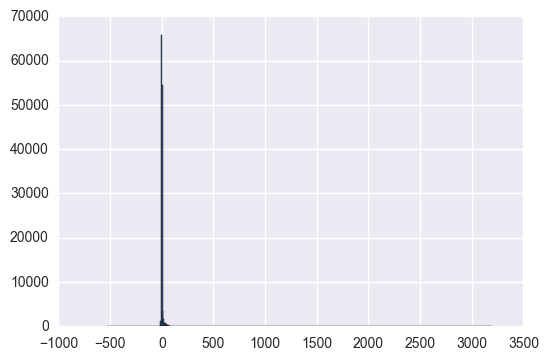

In [12]:
plt.hist(data['reputation'], bins=500)

(-20, 20)

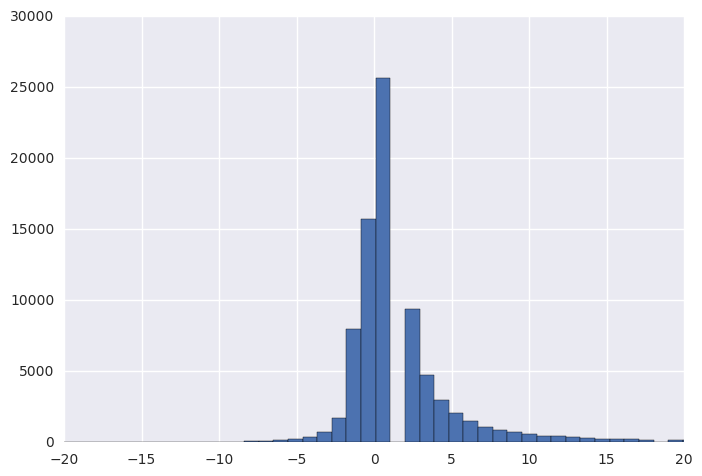

In [43]:
plt.hist(data['reputation'],bins=3000)
plt.xlim(-20,20)

In [13]:
## calculate the requency of reputation quantity
rep=Counter(data.reputation)

In [14]:
powerlaw.Fit(list(rep.values())).power_law.alpha

Calculating best minimal value for power law fit


1.6187403227878607

In [115]:
#powerlaw.Fit(list(rep.values())).power_law.D

Calculating best minimal value for power law fit


0.03062374839986215

## because neg values(reputation) can't take logrithm, so this plot doesn't conclude the negative reputation!! we scale up the reputation by add a abs(the mini reput)

In [645]:
data['reputation'].describe()

count    82144.000000
mean         3.663591
std         24.977701
min       -350.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       2481.000000
Name: reputation, dtype: float64

In [7]:
scale_up_repu=data['reputation']+350

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

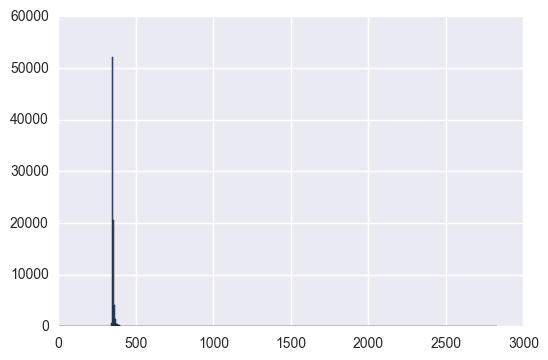

In [13]:
plt.hist(scale_up_repu,bins=500)

In [10]:
scale_up_repu_count=Counter(scale_up_repu)

## reci_reputation  distribution 不是powerlaw， 不能计算出其分布

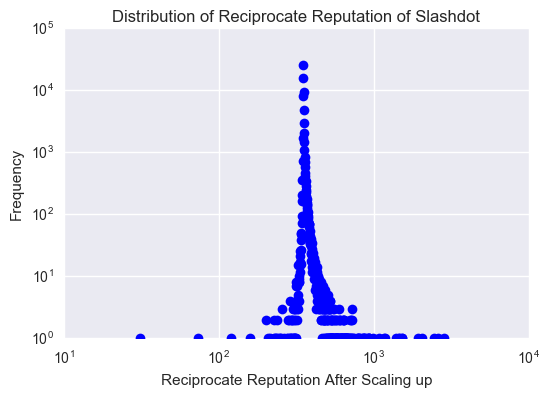

In [16]:
plt.loglog(list(scale_up_repu_count.keys()),list(scale_up_repu_count.values()),'b-',marker='o',linestyle='None')#,'b-',marker='o',linestyle='None'
plt.title("Distribution of Reciprocate Reputation of Slashdot")
plt.xlabel("Reciprocate Reputation After Scaling up")
plt.ylabel("Frequency")
#plt.text(1000, 1000, r'$\alpha=1.55$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})


In [19]:
# 不正常的alpha值再次证明不是powerlaw
powerlaw.Fit(scale_up_repu.values).power_law.alpha 

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


6.1483710307844825

In [20]:
test=powerlaw.Fit(scale_up_repu.values).power_law.KS

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [22]:
# compare two different distribution and see which one fit better
fittest=powerlaw.Fit(scale_up_repu.values)
#fittest.distribution_compare(‘power_law’,‘exponential’)
fittest.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(-0.74742625863305534, 0.19727050741867669)

In [24]:
fittest.distribution_compare('power_law', 'exponential')

(66.030161093045706, 5.8394469290728907e-05)

## 比较以上结果 比起powerlaw  data更像 lognormal

In [22]:
from scipy import stats


In [26]:
import fitter

//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.0011056509111591842)
Fitted anglit distribution with error=0.0014376078130314892)
Fitted arcsine distribution with error=0.0013548846574518302)
Fitted argus distribution with error=0.001465047788622959)


//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted beta distribution with error=0.0014583854467793433)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=0.0013032474100648317)
Fitted bradford distribution with error=0.0011849295584822938)
Fitted burr distribution with error=0.0012265454872792756)
Fitted burr12 distribution with error=0.000991479568622278)
Fitted cauchy distribution with error=0.0013317770246462413)
Fitted chi distribution with error=0.0005436621061246102)
Fitted chi2 distribution with error=0.0004824113565339211)
Fitted cosine distribution with error=0.0014326304405303397)
Fitted dgamma distribution with error=0.0011274903828658513)
Fitted dweibull distribution with error=0.0011938282413341207)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the er

Fitted erlang distribution with error=0.0014774598478924704)
Fitted expon distribution with error=0.00045709760288458547)
Fitted exponnorm distribution with error=0.0004555443735918913)
Fitted exponpow distribution with error=0.0007989560455265179)
Fitted exponweib distribution with error=0.0011905835538307547)
Fitted f distribution with error=0.0009719613613913982)
Fitted fatiguelife distribution with error=0.0009584774601848324)
Fitted fisk distribution with error=0.0008768628752749876)
Fitted foldcauchy distribution with error=0.0012920184645192755)


//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted foldnorm distribution with error=0.0004778843893539779)
Fitted frechet_l distribution with error=0.001488579141528653)
Fitted frechet_r distribution with error=0.0011891842318550285)
Fitted gamma distribution with error=0.0014774714302094119)
Fitted gausshyper distribution with error=0.0010545363579890037)
Fitted genexpon distribution with error=0.00045708688201810536)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Fitted genextreme distribution with error=0.0011141167200920653)
Fitted gengamma distribution with error=0.0009164253751272684)
Fitted genhalflogistic distribution with error=0.0014145045959544768)
Fitted genlogistic distribution with error=0.0004991942927353192)
Fitted gennorm distribution with error=0.0013415299508227612)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=0.0010257501627493949)
Fitted gilbrat distribution with error=0.0011446660339516255)
Fitted gompertz distribution with error=0.0002237040453434086)
Fitted gumbel_l distribution with error=0.0013933531529067855)
Fitted gumbel_r distribution with error=0.0005015994331638333)
Fitted halfcauchy distribution with error=0.0011222231674900376)
Fitted halfgennorm distribution with error=0.0010612900372567145)
Fitted halflogistic distribution with error=0.0002793284940248302)
Fitted halfnorm distribution with error=0.00027522504961879603)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2544: RuntimeWarning: overflow encountered in cosh
  return 1.0/(np.pi*np.cosh(x))


Fitted hypsecant distribution with error=0.0007003657958179332)
Fitted invgamma distribution with error=0.0010822047639438583)
Fitted invgauss distribution with error=0.0010481180818625719)
Fitted invweibull distribution with error=0.0013344205224668246)
Fitted johnsonsb distribution with error=0.001429915976529357)
Fitted johnsonsu distribution with error=0.0013611416320452234)
Fitted kappa3 distribution with error=0.0008459796407754313)
Fitted kappa4 distribution with error=0.0014469351321545168)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


SKIPPED ksone distribution (taking more than 30 seconds)


//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted kstwobign distribution with error=0.0006868738568805685)
Fitted laplace distribution with error=0.0008666323461649248)
Fitted levy distribution with error=0.00110571907494784)
Fitted levy_l distribution with error=0.00147165337362967)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=0.0011294002750188623)
Fitted logistic distribution with error=0.0004973671341053876)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=0.0009193907722206143)
Fitted lognorm distribution with error=0.0012436011294762826)
Fitted lomax distribution with error=0.0010721063268012792)
Fitted maxwell distribution with error=0.0006905346596282665)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Fitted mielke distribution with error=0.0014596793665004196)
Fitted nakagami distribution with error=0.000719785690912068)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.0006363498457969498)
Fitted pareto distribution with error=0.001072794381227003)
Fitted pearson3 distribution with error=0.0009661397577373784)
Fitted powerlaw distribution with error=0.0011227561138987265)
Fitted powerlognorm distribution with error=0.0013758454845190053)
Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.00039919593491804183)
Fitted rdist distribution with error=0.0009339826527272701)
Fitted recipinvgauss distribution with error=0.000940413904850026)
Fitted reciprocal distribution with error=0.0014774779910863547)
Fitted rice distribution with error=0.0005790742556178036)
SKIPPED rv_continuous distribution (ta

//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


Fitted trapz distribution with error=0.0014863309834230725)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


Fitted triang distribution with error=0.0014388962508571728)
Fitted truncexpon distribution with error=0.0014441479661763373)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=0.0014774779910863547)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3911: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=0.0014616304922020176)
Fitted vonmises distribution with error=5.744781695739801e+18)
Fitted vonmises_line distribution with error=0.0008894866387108996)
Fitted wald distribution with error=0.0008818958950405745)
Fitted weibull_max distribution with error=0.001488579141528653)
Fitted weibull_min distribution with error=0.0011891842318550285)
Fitted wrapcauchy distribution with error=nan)


//anaconda/lib/python3.5/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
gompertz,0.000224
halfnorm,0.000275
halflogistic,0.000279
skewnorm,0.000373
rayleigh,0.000399


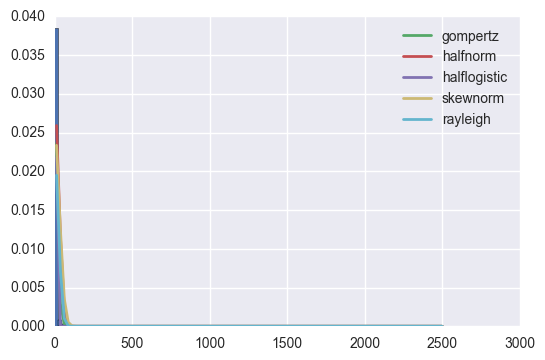

In [27]:
ff= fitter.Fitter(data['posi_indegree'])
ff.fit()
ff.summary()

In [164]:
#It allows you to call methods based on the contents of a string instead of typing the method name.
#dist=getattr(scipy.stats, 'powerlaw')
#params=dist.fit(data.reputation)

In [33]:
import scipy

In [34]:
params=getattr(scipy.stats, 't').fit(scale_up_repu)

In [35]:
stats.kstest(scale_up_repu, 't',params)

KstestResult(statistic=0.20635936977953834, pvalue=0.0)

In [36]:
stats.kstest(data['reputation'], 'norm')

KstestResult(statistic=0.50694418120683671, pvalue=0.0)

In [37]:
stats.kstest(data['reputation'], 'powerlaw',args=params)

KstestResult(statistic=0.99947652902220496, pvalue=0.0)

In [28]:
#This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.
stats.kstest(list(scale_up_repu.values), 'powerlaw',alternative='two-sided', mode='approx',args=(5,))

KstestResult(statistic=0.99998782625633031, pvalue=0.0)

In [ ]:
#fit.power_law.D #check the ks distance

## based on the above result, we reject  the null hypothesis that it is a powerlaw dist at the confidence interval of 95%  

In [358]:
data['normalized_reputation'].describe()

count    82144.000000
mean         0.469742
std          0.664568
min         -1.000000
25%          0.000000
50%          0.959592
75%          1.000000
max          1.000000
Name: normalized_reputation, dtype: float64

In [359]:
scipy.stats.skew(data['normalized_reputation'], axis=0, bias=True)

-1.0061365115779912

In [362]:
scipy.stats.kurtosis(data['normalized_reputation'], axis=0, fisher=True, bias=False)

-0.1686668261570845

In [361]:
scipy.stats.kurtosis(data['normalized_reputation'], axis=0, fisher=False, bias=False)

2.8313331738429155

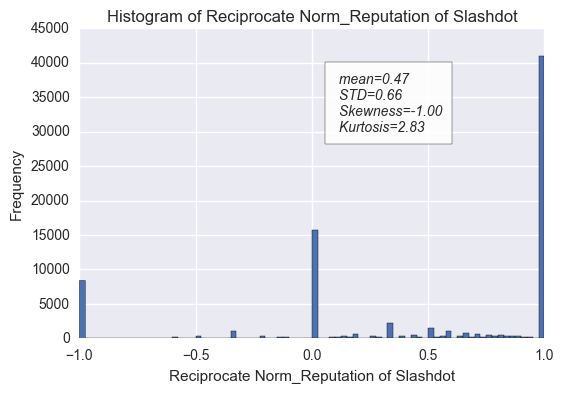

In [368]:
plt.hist(data['normalized_reputation'], bins=80)
plt.xlabel('Reciprocate Norm_Reputation of Slashdot')
plt.ylabel('Frequency')
plt.text(0.1, 30000, ' mean=0.47 \n STD=0.66\n Skewness=-1.00\n Kurtosis=2.83',fontsize=10, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})

plt.title("Histogram of Reciprocate Norm_Reputation of Slashdot")

In [53]:
min(data['normalized_reputation'])

-1.0

In [9]:
norm_repu_scale_up=data.normalized_reputation + 1

In [57]:
norm_rep_counter=Counter(norm_repu_scale_up)


In [45]:
plt.title("Distribution of Reciprocate Reputation of Slashdot")
plt.xlabel("Reciprocate Reputation After Scaling up")
plt.ylabel("Frequency")

Counter({0.7734375: 1,
         0.75: 372,
         0.49659863945578231: 1,
         -0.125: 17,
         1.0: 40987,
         0.77263157894736845: 1,
         0.68627450980392157: 1,
         0.51063829787234039: 2,
         0.89130434782608692: 1,
         0.52631578947368418: 1,
         0.55436720142602491: 1,
         0.86376021798365121: 1,
         0.55000000000000004: 4,
         0.96129032258064517: 1,
         -0.0625: 4,
         -0.3888888888888889: 1,
         0.7567567567567568: 1,
         0.65000000000000002: 3,
         -0.35714285714285715: 3,
         0.60869565217391308: 2,
         0.31372549019607843: 1,
         0.17460317460317459: 1,
         0.52317880794701987: 2,
         0.68181818181818177: 1,
         0.22222222222222221: 13,
         0.14754098360655735: 2,
         -0.083333333333333329: 5,
         0.75129533678756477: 1,
         0.42138364779874216: 1,
         0.68240343347639487: 1,
         0.94029850746268662: 1,
         0.82558139534883723: 1,


In [58]:
norm_rep_counter

Counter({0.5: 353,
         1.7456140350877192: 1,
         2.0: 40987,
         1.8769230769230769: 3,
         0.875: 17,
         1.5942028985507246: 1,
         1.6000000000000001: 961,
         1.4264705882352942: 1,
         1.6319018404907975: 1,
         1.6119402985074627: 1,
         1.9521531100478469: 1,
         1.8467432950191571: 1,
         1.6486486486486487: 1,
         0.55000000000000004: 1,
         0.0: 8390,
         1.3125: 8,
         1.8909090909090909: 4,
         1.045643153526971: 1,
         1.8412698412698414: 3,
         1.7525773195876289: 1,
         1.3880597014925373: 1,
         1.3599999999999999: 18,
         1.5377777777777779: 1,
         0.22222222222222221: 13,
         1.5584415584415585: 2,
         1.1176470588235294: 4,
         1.1842105263157894: 1,
         0.7857142857142857: 1,
         1.8144329896907216: 2,
         1.1904761904761905: 2,
         0.94117647058823528: 12,
         1.0638297872340425: 2,
         0.90000000000000002:

In [59]:
powerlaw.Fit(norm_repu_scale_up).power_law.alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


2.3181895591414481

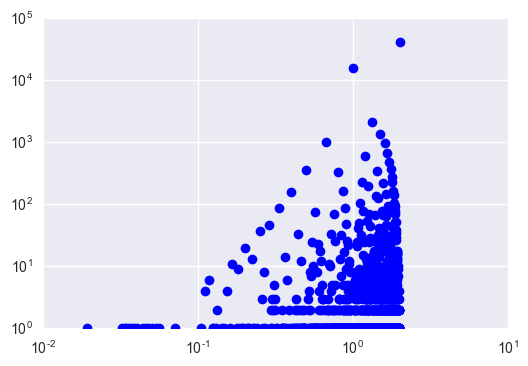

In [61]:
plt.loglog(list(norm_rep_counter.keys()),list(norm_rep_counter.values()),'b-',marker='o',linestyle='None')

## the above shows the norm_rep_counter is not powerlaw distributed

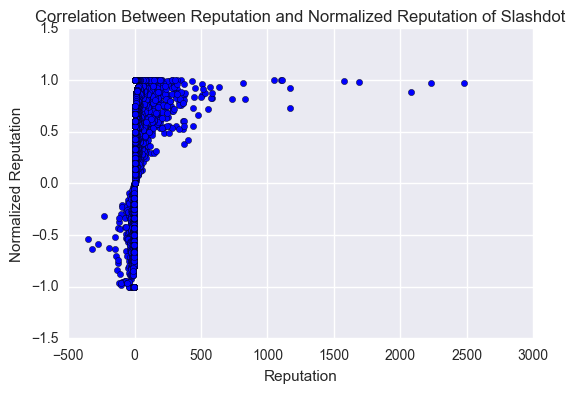

In [131]:
plt.scatter(data['reputation'],data["normalized_reputation"])
plt.xlabel('Reputation')
plt.ylabel('Normalized Reputation')
plt.title("Correlation Between Reputation and Normalized Reputation")

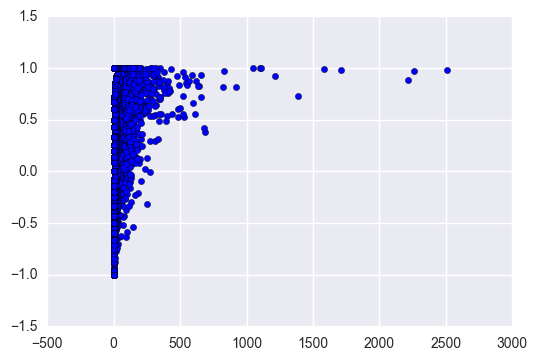

In [66]:
plt.scatter(data['posi_indegree'],data["normalized_reputation"],)

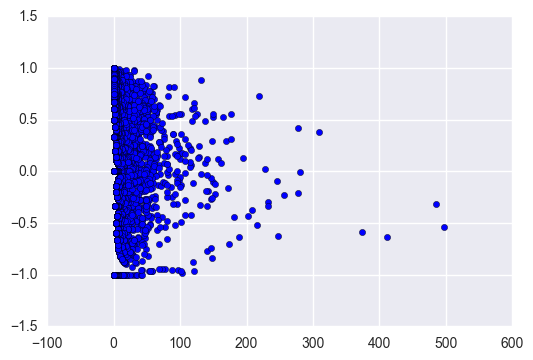

In [67]:
plt.scatter(data['neg_indegree'],data["normalized_reputation"],)

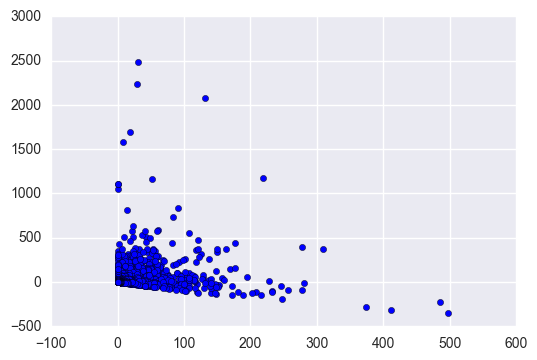

In [70]:
plt.scatter(data['neg_indegree'],data["reputation"],)

In [72]:
import numpy as np

In [111]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=0.87896756844684665, intercept=-0.88481815171939537, rvalue=0.96186598781878818, pvalue=0.0, stderr=0.00087210056135907847)

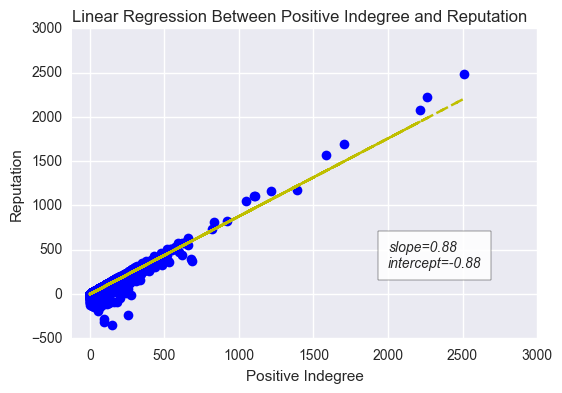

In [135]:
import numpy as np
import matplotlib.pyplot as plt

x=list(data['posi_indegree'].values)
y=list (data["reputation"].values)

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'bo', x, fit_fn(x), '--y')
plt.text(2000,300,'slope=0.88\nintercept=-0.88',fontsize=10, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
plt.xlim(-120, 3000)
plt.ylim(-500, 3000)
plt.xlabel('Positive Indegree')
plt.ylabel('Reputation')
plt.title("Linear Regression Between Positive Indegree and Reputation  ")


In [31]:
import scipy

In [136]:
scipy.stats.skew(data['normalized_reputation'], axis=0, bias=True) #-0.88 is highly right skewed

-1.0061365115779912

In [137]:
scipy.stats.skew(data['reputation'], axis=0, bias=True)

44.980380924136675

In [138]:
scipy.stats.skew(data, axis=0, bias=True)

array([  9.47232491e-18,   9.47232491e-18,   8.73722550e+00,
         3.91050008e+01,   1.48540322e+01,   2.28406070e+01,
         2.15230775e+01,   1.49243663e+01,   4.73402100e+01,
         4.52508213e+01,   4.49803809e+01,  -1.00613651e+00,
         4.31411799e+00,   2.00136570e+01,   4.55121397e-01,
         2.41038927e+00])

In [54]:
fit_rep.distribution_compare('power_law','exponential')

(48.66274300953215, 0.00097922139464094054)

## analyze the lognormal distribution

In [61]:
fit_rep.distribution_compare('power_law','lognormal')

(-0.066630386628638405, 0.82546272896063466)

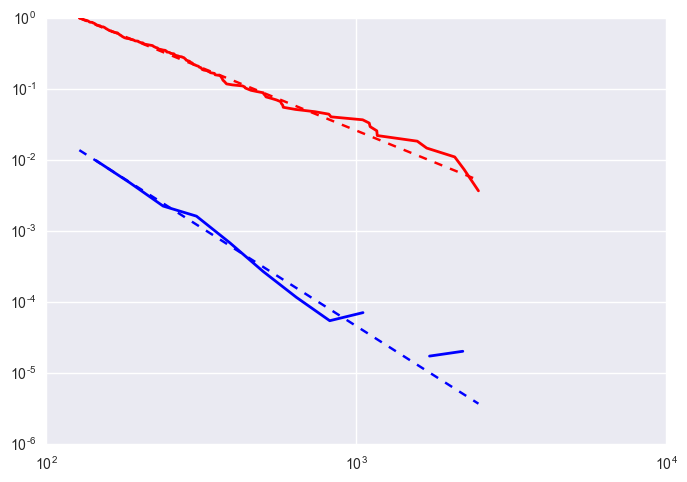

In [62]:
fig2 = fit_rep.plot_pdf(color='b',linewidth=2)
fit_rep.power_law.plot_pdf(color='b',linestyle='--', ax=fig2)
fit_rep.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit_rep.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)

In [60]:
fit_norm_repu.xmin

NameError: name 'fit_norm_repu' is not defined

In [33]:
##if the fixed xmin is the real min?? 
fit_norm_repu.fixed_xmin

False

In [34]:
fit_norm_repu.xmax

## linear regression between varialbes and the norm_reputation

In [36]:
data_zscore.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,-1.732038,-1.732038,-0.196689,-0.168348,0.004509,-0.171035,-0.058291,-0.183608,-0.095680,-0.039584,-0.146614,-0.504638,-0.430023,-0.119226,-1.116915,-0.282192
1,-1.732011,-1.732011,-0.196689,-0.137424,0.004509,0.011231,-0.058291,-0.183608,-0.095680,-0.039579,-0.146614,-0.504638,-0.430023,-0.119226,-1.116915,-0.282418
2,-1.731985,-1.731985,-0.160559,-0.137424,-0.068663,-0.171035,-0.058003,-0.183608,-0.095680,-0.039584,-0.114073,0.989405,3.425185,-0.119226,-1.116748,-0.283095
3,-1.731959,-1.731959,-0.196689,-0.044653,-0.068663,-0.171035,-0.056429,-0.183608,-0.095680,-0.039584,-0.016452,0.989405,0.855047,-0.119226,-1.116915,-0.283095
4,-1.731933,-1.731933,0.128478,-0.137424,0.297193,-0.171035,-0.058287,-0.183608,0.021285,-0.039584,-0.114073,0.989405,-0.430023,-0.119226,0.937056,4.366143


In [16]:
data_zscore.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [75]:
X=data_zscore[['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_eigenvalue', 'neg_eigenvalue','posi_between', 'neg_between', 
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close']]
Y=data_zscore['normalized_reputation']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
lr_clf=linear_model.LinearRegression().fit(X_train, Y_train)
Y_pred=lr_clf.predict(X_test)
# The coefficients
print('Coefficients: \n', lr_clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ 0.16040269  0.18624789 -0.02127591 -0.10126328 -0.04899249 -0.1620135
 -0.09017411  0.06333622  0.18237054 -0.05695201  0.06388776 -0.00654464]
Mean squared error: 0.87
Variance score: 0.12


## 区别三种centrality在 linear model 上的表现

In [68]:
degree_list=['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree']
centrality_list=[['posi_eigenvalue', 'neg_eigenvalue'],[ 'posi_between', 'neg_between'],['posi_close', 'neg_close']]
deg_clust_list=['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_cluster', 'neg_cluster']
X1=data_zscore[deg_clust_list].join(data_zscore[centrality_list[0]])


def do_lr(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
    lr_clf=linear_model.LinearRegression().fit(X_train, Y_train)
    Y_pred=lr_clf.predict(X_test)
    result_list=[['Coefficients: ',lr_clf.coef_],["Mean squared error:", mean_squared_error(Y_test, Y_pred)], ['Variance score', r2_score(Y_test, Y_pred)]
                 return print(1)
    #return print(*result_list, sep='\n')
                 

In [77]:
def do_lr(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
    lr_clf=linear_model.LinearRegression().fit(X_train, Y_train)
    Y_pred=lr_clf.predict(X_test)
    return print('Coefficients: \n', lr_clf.coef_,'\n', "Mean squared error: %.2f \n"
      % mean_squared_error(Y_test, Y_pred),   'Variance score: %.2f \n' % r2_score(Y_test, Y_pred))

In [78]:
for i in range(0,3):
    X1=data_zscore[deg_clust_list].join(data_zscore[centrality_list[i]])
    print(centrality_list[i])
    do_lr(X1,Y)

['posi_eigenvalue', 'neg_eigenvalue']
Coefficients: 
 [ 0.11440199  0.15492632  0.03331685 -0.08547593  0.19981723 -0.05458713
 -0.03071454 -0.16245505] 
 Mean squared error: 0.88 
 Variance score: 0.12 

['posi_between', 'neg_between']
Coefficients: 
 [ 0.14123398  0.174126   -0.03413978 -0.23743133  0.19345755 -0.07439602
 -0.07083559  0.06844511] 
 Mean squared error: 0.88 
 Variance score: 0.11 

['posi_close', 'neg_close']
Coefficients: 
 [ 0.07956971  0.14825488  0.02121142 -0.21945481  0.17976182 -0.07482996
  0.07246408 -0.00478659] 
 Mean squared error: 0.88 
 Variance score: 0.12 



In [79]:
do_lr(data[['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree']], data['normalized_reputation'])

Coefficients: 
 [ 0.00233415  0.00324102  0.00101008 -0.02804761] 
 Mean squared error: 0.42 
 Variance score: 0.06 



In [80]:
#(1)
do_lr(data_zscore[['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree']], Y)

Coefficients: 
 [ 0.09652225  0.15658613  0.02062421 -0.22990731] 
 Mean squared error: 0.93 
 Variance score: 0.06 



In [81]:
do_lr(data[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between',
        'posi_close', 'neg_close']], data['normalized_reputation'])

Coefficients: 
 [  1.23759103e+01  -5.59436248e+01   5.80971068e+02   4.67598962e+02
   1.83055351e+00   4.39265454e-01] 
 Mean squared error: 0.42 
 Variance score: 0.06 



In [82]:
#(3)(4)(5)
do_lr(data_zscore[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between',
        'posi_close', 'neg_close']], Y)

Coefficients: 
 [ 0.05083935 -0.22641763  0.08468718  0.07508029  0.14286014  0.02235246] 
 Mean squared error: 0.93 
 Variance score: 0.06 



In [83]:
#(2)(3)(4)(5)
do_lr(data_zscore[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close']], Y)


Coefficients: 
 [ 0.03278976 -0.21518391  0.09085436  0.07099479  0.18056912 -0.04375543
  0.0989242   0.03191559] 
 Mean squared error: 0.89 
 Variance score: 0.10 



## 证明这个差别是否statistical significant

## Treel model  between variables and the norm_reputation
## 因为tree 是non－parametric modle， 所以用原始数据

In [91]:
X=data[['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_eigenvalue', 'neg_eigenvalue','posi_between', 'neg_between', 
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close']]
Y=data['normalized_reputation']

In [85]:
X

,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,1,0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000031
1,0,1,1,1,0.000000e+00,0.000000e+00,0.000000,5.322455e-10,0.000000,0.000000,0.000000,0.000023
2,1,1,0,0,7.937208e-07,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000009,0.000000
3,0,4,0,0,5.121504e-06,0.000000e+00,0.000000,0.000000e+00,0.333333,0.000000,0.000000,0.000000
4,9,1,5,0,1.326853e-08,0.000000e+00,0.000011,0.000000e+00,0.000000,0.000000,0.107290,0.158350
5,498,1222,491,134,3.393674e-03,6.334126e-02,0.002846,4.282117e-03,0.044534,0.010602,0.145523,0.200117
6,0,0,2,0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000062
7,4,1,2,171,3.434647e-08,4.217874e-02,0.000006,8.621202e-06,0.000000,0.008671,0.101432,0.000046
8,0,1,0,46,2.622398e-10,2.502917e-02,0.000000,0.000000e+00,0.000000,0.040580,0.000000,0.000000
9,1,0,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.091802,0.000000


In [86]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
X.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [52]:
tree_clf = DecisionTreeRegressor() #critiron is MSE
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
tree_clf.fit(X_train,Y_train)
Y_pred=tree_clf.predict(X_test)
mean_squared_error(Y_test,Y_pred)
tree_clf.feature_importances_

array([  1.16492797e-06,   7.00537500e-01,   4.66289407e-07,
         2.99437294e-01,   1.86937433e-06,   3.43523424e-06,
         5.08623132e-06,   1.53717051e-06,   1.37996622e-06,
         4.78988027e-06,   4.14414023e-06,   1.33346238e-06])

In [53]:
feature_impor=tree_clf.feature_importances_

In [348]:
feature_impor_pd = pd.DataFrame(feature_impor,columns=["importance"])

In [54]:
## test with only the three most importnat feature
do_tree_r(X[['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',]],Y)
## the MSE is higher

Mean squared error: %.2f 
 2.50327751849e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree'], dtype='object') 
 [  3.08323757e-06   7.00544737e-01   5.09751782e-06   2.99447082e-01]


In [87]:
def do_tree_r(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
    tree_clf = DecisionTreeRegressor() #critiron is MSE
    tree_clf.fit(X_train,Y_train)
    Y_pred=tree_clf.predict(X_test)
    return print("Mean squared error: %.2f \n", mean_squared_error(Y_test,Y_pred),'\n', "Feature Importances: \n", X.columns,"\n", tree_clf.feature_importances_)


In [88]:
do_tree_r(X,Y)

Mean squared error: %.2f 
 4.86855663382e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object') 
 [  1.83244837e-06   7.00539284e-01   4.03711298e-07   2.99437579e-01
   2.86441614e-06   4.35103778e-06   4.91935058e-06   1.19722352e-06
   1.20104689e-06   1.24858407e-06   3.64175361e-06   1.47745405e-06]


In [58]:
Decimal(4.41416648301e-05),Decimal(3.62258158e-01)

(Decimal('0.00004414166483009999909954690355817774616298265755176544189453125'),
 Decimal('0.362258157999999996778939248542883433401584625244140625'))

In [57]:
#用 treemodel 比较centrality 重要性
for i in range(0,3):
    X1=data[deg_clust_list].join(data[centrality_list[i]])
    print(centrality_list[i])
    do_tree_r(X1,Y)
##减少任意一对centrality对预测准确性无影响 

['posi_eigenvalue', 'neg_eigenvalue']
Mean squared error: %.2f 
 4.41416648301e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_cluster', 'neg_cluster', 'posi_eigenvalue', 'neg_eigenvalue'],
      dtype='object') 
 [  1.58897595e-06   7.00543730e-01   1.14882462e-06   2.99438759e-01
   4.73281009e-06   1.66105915e-06   3.70270245e-06   4.67608225e-06]
['posi_between', 'neg_between']
Mean squared error: %.2f 
 5.66374837421e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_cluster', 'neg_cluster', 'posi_between', 'neg_between'],
      dtype='object') 
 [  1.77749235e-06   7.00542950e-01   3.95359911e-06   2.99439406e-01
   4.53153470e-06   2.26888582e-06   3.22206563e-06   1.89061099e-06]
['posi_close', 'neg_close']
Mean squared error: %.2f 
 4.19635028749e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegr

In [407]:
Decimal(4.8942428598e-05 )

Decimal('0.0000489424285979999997855081905751006843274808488786220550537109375')

In [96]:
do_tree_r(data[['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree']], Y)

Mean squared error: %.2f 
 2.53485515722e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree'], dtype='object') 
 [  3.79922232e-06   7.00544994e-01   3.64186954e-06   2.99447565e-01]


In [93]:

do_tree_r(data[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between',
        'posi_close', 'neg_close']], Y)

Mean squared error: %.2f 
 0.173841183851 
 Feature Importances: 
 Index(['posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_close', 'neg_close'],
      dtype='object') 
 [ 0.14505276  0.3001283   0.12527342  0.003392    0.35746442  0.06868909]


In [95]:

do_tree_r(data[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close']], Y)

Mean squared error: %.2f 
 0.166163077657 
 Feature Importances: 
 Index(['posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object') 
 [ 0.10036717  0.29471207  0.07740184  0.00313094  0.27114229  0.00177722
  0.18566075  0.06580771]


## degree 对结果重要性

In [389]:
degree_list

['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree']

In [390]:
do_tree_r(X[degree_list],Y)

Mean squared error: %.2f 
 4.85387100105e-05 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree'], dtype='object') 
 [  7.45502993e-06   6.37714176e-01   7.11254007e-06   3.62271256e-01]


In [391]:
do_tree_r(X[['posi_indegree','neg_indegree']],Y)

Mean squared error: %.2f 
 2.5942594175e-05 
 Feature Importances: 
 Index(['posi_indegree', 'neg_indegree'], dtype='object') 
 [ 0.63772024  0.36227976]


In [444]:
#生成tree图
dotfile = StringIO() 
tree_clf.fit(X[['posi_indegree','neg_indegree']],Y)
tree.export_graphviz(tree_clf, out_file=dotfile,feature_names=['posi_indegree','neg_indegree'], max_depth=4) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("tree_example2.png")

True

## linear modlle to predict neg indegree


In [412]:
data_zscore.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,norm_repu_scale_up
0,-1.732030,-1.732030,0.994168,7.093406,0.271396,3.590462,4.710430,5.452621,3.705629,1.813709,6.659437,0.415118,-0.169132,0.142411,1.510060,2.736620,0.415118
1,-1.731988,-1.731988,3.542224,3.282481,2.205039,2.520500,1.093740,6.397322,3.521024,1.351826,2.815985,0.253082,-0.099204,0.297681,1.794122,2.982429,0.253082
2,-1.731945,-1.731945,-0.252753,0.534217,-0.135686,-0.154405,-0.009780,-0.212451,-0.093764,-0.070273,0.654044,0.797904,-0.155792,-0.087792,-0.824350,-0.368884,0.797904
3,-1.731903,-1.731903,0.289386,1.560236,-0.135686,0.380576,3.147364,0.693535,0.321006,-0.070273,1.574871,0.513990,0.946529,-0.087792,1.330432,-0.368884,0.513990
4,-1.731861,-1.731861,-0.252753,3.795490,-0.135686,1.718028,1.218051,2.926174,-0.064564,-0.070273,3.616704,0.433852,-0.216716,-0.087792,-0.824197,-0.368884,0.433853


In [413]:
data_zscore.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up'],
      dtype='object')

In [419]:
data_zscore_posi=data_zscore[['posi_outdegree', 'posi_indegree',
       'posi_eigenvalue', 
       'posi_between', 
       'posi_cluster',  'posi_close', ]]
data_zscore_negin=data_zscore[['neg_indegree']]


In [420]:
do_lr(data_zscore_posi,data_zscore_negin)
## linear 不能用来以posi 预测neg_in

Coefficients: 
 [[ 0.10929686  0.48865419 -0.06847285 -0.06027081 -0.01160333  0.0277272 ]] 
 Mean squared error: 0.76 
 Variance score: 0.15 



## Tree modlle to predict neg indegree

In [421]:
data_posi=data[['posi_outdegree', 'posi_indegree',
       'posi_eigenvalue', 
       'posi_between', 
       'posi_cluster',  'posi_close', ]]
data_negin=data[['neg_indegree']]


In [423]:
#tree model on the zscore data 
#to compare the result with the linear regresssion
do_tree_r(data_zscore_posi,data_zscore_negin)

Mean squared error: %.2f 
 1.06928810824 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'posi_eigenvalue', 'posi_between',
       'posi_cluster', 'posi_close'],
      dtype='object') 
 [ 0.05655214  0.40537341  0.158819    0.09086915  0.20212689  0.08625942]


In [422]:
do_tree_r(data_posi,data_negin)

Mean squared error: %.2f 
 65.4965184851 
 Feature Importances: 
 Index(['posi_outdegree', 'posi_indegree', 'posi_eigenvalue', 'posi_between',
       'posi_cluster', 'posi_close'],
      dtype='object') 
 [ 0.06850574  0.4293687   0.15592356  0.0877609   0.2011051   0.05733599]


## 这一次结果表示linear 在预测negin上比tree好

In [520]:
dotfile = StringIO() 
tree.export_graphviz(tree_neg_indegree, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("tree_predict_neg_indegree.png")

True

In [558]:
tree_neg_indegree.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

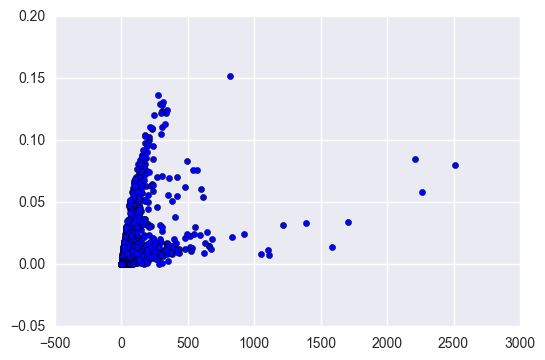

In [431]:
##因为indegree eigenvector centrality_list very related
##so eigenvector centrality can be well used to predict norm_reputation
plt.scatter(data['posi_indegree'],data['posi_eigenvalue'])

In [214]:
chisquare([data["posi_indegree"],data["posi_eigenvalue"]])

Power_divergenceResult(statistic=array([ 198.94983759,   94.98745088,   19.99892817, ...,           nan,
          1.        ,           nan]), pvalue=array([  3.54000426e-45,   1.91596006e-22,   7.74855851e-06, ...,
                    nan,   3.17310508e-01,              nan]))

In [215]:
from scipy.stats import chi2_contingency

In [216]:
chi2_contingency([data["posi_indegree"],data["posi_eigenvalue"]])

ValueError: The internally computed table of expected frequencies has a zero element at (0, 126).

In [432]:
#when tested by zscore, the two variables are identical
scipy.stats.ttest_ind(data_zscore.posi_indegree, data_zscore.posi_eigenvalue, equal_var=False) # assume independent two variables


Ttest_indResult(statistic=-6.8367428636314675e-16, pvalue=0.99999999999999944)

In [438]:
scipy.stats.ttest_ind(data.posi_indegree, data.posi_eigenvalue) 

Ttest_indResult(statistic=54.255975723214142, pvalue=0.0)

In [437]:
#this test assume two variables dependent
scipy.stats.ttest_rel(data.posi_indegree, data.posi_eigenvalue) 


Ttest_relResult(statistic=54.259536864867499, pvalue=0.0)

解释
The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

## KS test to test if the data is normally distributed

In [222]:
from scipy import stats


In [223]:
stats.kstest(data['neg_eigenvalue'], 'norm') #ks test把sample mean 当作population mean

KstestResult(statistic=0.5, pvalue=0.0)

## Normalization of the data

In [140]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [144]:
data.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,41071.500000,5.174718,5.174718,1.511127,1.511127,0.000391,0.000725,1.639090e-05,0.000011,3.663591,0.469742,0.054793,0.003611,0.066103,0.017169
std,23713.074593,23713.074593,18.575064,27.333433,9.944356,7.590762,0.003467,0.003413,1.715800e-04,0.000161,24.977701,0.664568,0.182795,0.041132,0.080188,0.046543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,20535.750000,20535.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41071.500000,41071.500000,1.000000,1.000000,0.000000,0.000000,0.000006,0.000000,0.000000e+00,0.000000,1.000000,0.959592,0.000000,0.000000,0.000013,0.000000
75%,61607.250000,61607.250000,3.000000,3.000000,0.000000,1.000000,0.000065,0.000139,2.007023e-07,0.000000,2.000000,1.000000,0.010870,0.000000,0.153796,0.000000
max,82143.000000,82143.000000,428.000000,2512.000000,400.000000,498.000000,0.151865,0.161218,1.768646e-02,0.016219,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460


# replace normalized_reputation with  norm_repu_scale_up

In [143]:
len(norm_repu_scale_up), len(data)

(82144, 82144)

In [10]:
data['norm_repu_scale_up']=norm_repu_scale_up

In [19]:
data2

In [13]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up'],
      dtype='object')

In [25]:
for i in ['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up']:
    print(stats.kstest(data[i], 'norm'))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.59482643675806379, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.50694418120683671, pvalue=0.0)
KstestResult(statistic=0.35676373198285938, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.6981084780514023, pvalue=0.0)


In [41]:
#logarithm creat infinity number
log_data=np.log10(data)

In [34]:
np.log10(10),np.log2(10)

(1.0, 3.3219280948873622)

In [ ]:
#lognormal fit

In [170]:
parameters

(0.065636826331309739, 1.0125158897248772)

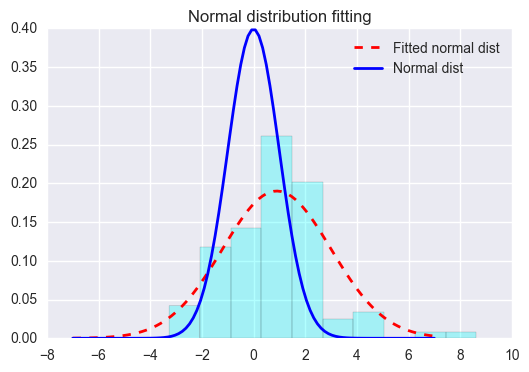

In [188]:
random_sample=norm.rvs(loc=1,scale=2,size=100)
x=np.linspace(-7,7,100)
fitted_pdf=norm.pdf(x,loc=0.9,scale=2.1)
normal_pdf=norm.pdf(x)
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(random_sample,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
plt.legend()


In [190]:
data_zscore['normalized_reputation'].describe()

count    8.214400e+04
mean    -2.846211e-14
std      1.000006e+00
min     -2.211589e+00
25%     -7.068410e-01
50%      7.370999e-01
75%      7.979040e-01
max      7.979040e-01
Name: normalized_reputation, dtype: float64

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

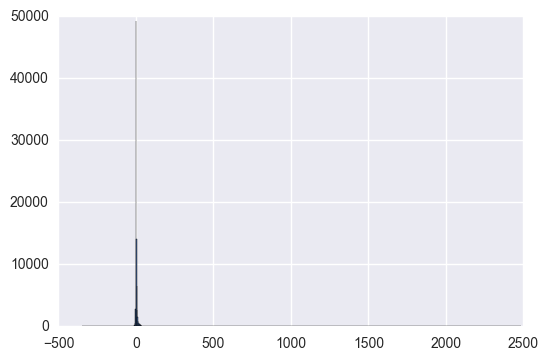

In [231]:
plt.hist(data['reputation'],bins=1000)

(-50, 50)

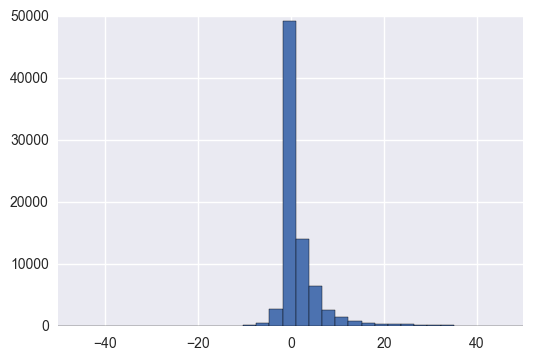

In [233]:
plt.hist(data['reputation'],bins=1000)
plt.xlim(-50,50)

(0, 100)

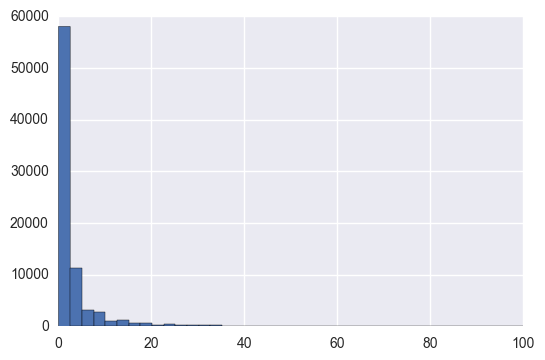

In [227]:
plt.hist(data['posi_indegree'],bins=1000)
plt.xlim(0,100)

In [222]:
norm.fit(data['posi_close'].values)

(0.066102796435236255, 0.080187558152375979)

In [218]:
parameters

(1.6390898295774304e-05, 0.00017157891674526326)

In [224]:
normal_pdf

array([ 0.38138782,  0.38207486,  0.38274909,  0.38341042,  0.38405878,
        0.38469412,  0.38531635,  0.38592541,  0.38652124,  0.38710376,
        0.38767293,  0.38822867,  0.38877093,  0.38929965,  0.38981476,
        0.39031622,  0.39080398,  0.39127796,  0.39173814,  0.39218445,
        0.39261685,  0.39303528,  0.39343972,  0.3938301 ,  0.39420639,
        0.39456854,  0.39491652,  0.3952503 ,  0.39556982,  0.39587506,
        0.39616598,  0.39644256,  0.39670476,  0.39695255,  0.3971859 ,
        0.3974048 ,  0.39760921,  0.39779911,  0.39797449,  0.39813532,
        0.39828159,  0.39841327,  0.39853036,  0.39863284,  0.39872071,
        0.39879394,  0.39885254,  0.39889649,  0.3989258 ,  0.39894045,
        0.39894045,  0.3989258 ,  0.39889649,  0.39885254,  0.39879394,
        0.39872071,  0.39863284,  0.39853036,  0.39841327,  0.39828159,
        0.39813532,  0.39797449,  0.39779911,  0.39760921,  0.3974048 ,
        0.3971859 ,  0.39695255,  0.39670476,  0.39644256,  0.39

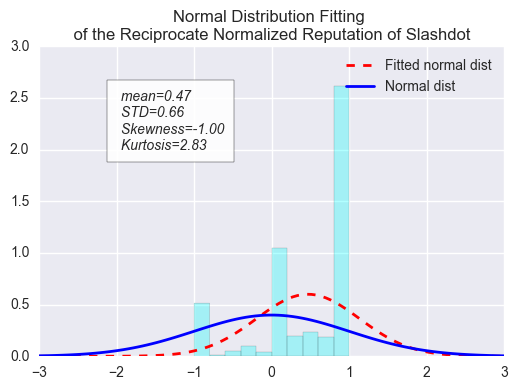

In [442]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
# Generate an array of 200 random sample from a normal dist with 
# mean 0 and stdv 1
#random_sample = norm.rvs(loc=0,scale=1,size=200) 
random_sample = data['normalized_reputation'].values

# Distribution fitting
# norm.fit(data) returns a list of two parameters 
# (mean, parameters[0] and std, parameters[1]) via a MLE approach 
# to data, which should be in array form.
parameters = norm.fit(random_sample)

# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
#x = np.linspace(-2.3,0.8,100)
#x = np.linspace(-0.0006,0.0006,1000) #posi between
x = np.linspace(-3,3,100)

# Generate the pdf (fitted distribution)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
# Generate the pdf (normal distribution non fitted)
normal_pdf = norm.pdf(x)

# Type help(plot) for a ton of information on pyplot
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(random_sample,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.text(-2, 2, ' mean=0.47 \n STD=0.66\n Skewness=-1.00\n Kurtosis=2.83',fontsize=10, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})

plt.title("Normal Distribution Fitting \n of the Reciprocate Normalized Reputation of Slashdot ")
# insert a legend in the plot (using label)
plt.legend()
#plt.xlim(-2,2)
# we finally show our work
plt.show()


## 0830 apply z_score normalization

In [153]:
log_data2=np.log10(data2)

In [155]:
import scipy

In [156]:
scipy.stats.norm.fit(log_data2['posi_eigenvalue'], loc=log_data2['posi_eigenvalue'].mean(), scale=log_data2['posi_eigenvalue'].std())

(-5.3097260881631918, 2.18678575694778)

In [161]:
type(log_data2['posi_eigenvalue'].values)

numpy.ndarray

In [162]:
type(ser)

numpy.ndarray

//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


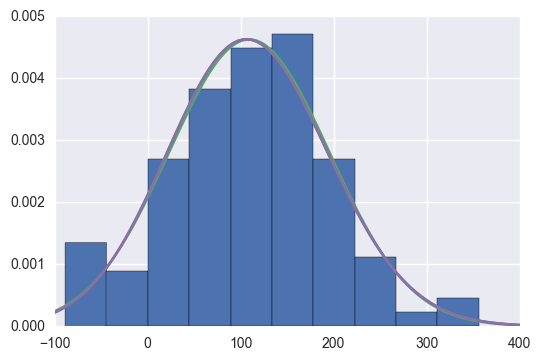

In [166]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
#ser = log_data2['posi_eigenvalue'].values
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20


# plot normed histogram
plt.hist(ser,normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show()  

In [42]:
for i in ['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up']:
    print(stats.kstest(log_data[i], 'norm'))
#log transfer没用！！

KstestResult(statistic=0.48742452278924814, pvalue=0.0)
KstestResult(statistic=0.25348169068952087, pvalue=0.0)
KstestResult(statistic=0.82212943124269577, pvalue=0.0)
KstestResult(statistic=0.64334583171016746, pvalue=0.0)
KstestResult(statistic=0.97899574216592822, pvalue=0.0)
KstestResult(statistic=0.96299311448251956, pvalue=0.0)
KstestResult(statistic=0.99652370674356572, pvalue=0.0)
KstestResult(statistic=0.99647056137766243, pvalue=0.0)
KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=nan, pvalue=nan)
KstestResult(statistic=0.76672307774097959, pvalue=0.0)
KstestResult(statistic=0.94560771328398907, pvalue=0.0)
KstestResult(statistic=0.74465292475379874, pvalue=0.0)
KstestResult(statistic=0.87753768493248507, pvalue=0.0)
KstestResult(statistic=0.38169581076965786, pvalue=0.0)


In [43]:
# exponential 
exp_data=np.exp(data)

In [44]:
for i in ['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up']:
    print(stats.kstest(exp_data[i], 'norm'))
#exponential没用！！

KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.6981084780514023, pvalue=0.0)
KstestResult(statistic=0.6981084780514023, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.84134474606854293, pvalue=0.0)
KstestResult(statistic=0.85772518076047044, pvalue=0.0)


In [94]:
data.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,norm_repu_scale_up
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,41071.500000,5.174718,5.174718,1.511127,1.511127,0.000391,0.000725,1.639090e-05,0.000011,3.663591,0.469742,0.054793,0.003611,0.066103,0.017169,1.469742
std,23713.074593,23713.074593,18.575064,27.333433,9.944356,7.590762,0.003467,0.003413,1.715800e-04,0.000161,24.977701,0.664568,0.182795,0.041132,0.080188,0.046543,0.664568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20535.750000,20535.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,41071.500000,41071.500000,1.000000,1.000000,0.000000,0.000000,0.000006,0.000000,0.000000e+00,0.000000,1.000000,0.959592,0.000000,0.000000,0.000013,0.000000,1.959592
75%,61607.250000,61607.250000,3.000000,3.000000,0.000000,1.000000,0.000065,0.000139,2.007023e-07,0.000000,2.000000,1.000000,0.010870,0.000000,0.153796,0.000000,2.000000
max,82143.000000,82143.000000,428.000000,2512.000000,400.000000,498.000000,0.151865,0.161218,1.768646e-02,0.016219,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460,2.000000


In [85]:
# replace 0 in centrality(except degree) to 0.000001
#replace 0 in degree to 1

In [58]:
data2=data.copy()

In [81]:
for i in ['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree']:
    data2[i].replace(to_replace=[0],value=1,inplace=True)

In [96]:
alist=['posi_eigenvalue', 'neg_eigenvalue','posi_between', 'neg_between', 'reputation', 'normalized_reputation','posi_cluster', 'neg_cluster', 'posi_close', 'neg_close','norm_repu_scale_up']
for i in alist:
    data2[i].replace(to_replace=[0],value=0.000001,inplace=True)

In [98]:
data2.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,norm_repu_scale_up
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,41071.500000,5.662142,5.421236,2.333256,2.154473,3.911912e-04,7.260335e-04,1.708176e-05,1.234304e-05,3.663591,0.469742,0.054794,0.003612,0.066103,0.017170,1.469742
std,23713.074593,23713.074593,18.445548,27.290126,9.826075,7.476947,3.467111e-03,3.412735e-03,1.715146e-04,1.614141e-04,24.977701,0.664568,0.182794,0.041132,0.080188,0.046543,0.664568
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.397940e-19,2.242042e-23,4.214510e-12,1.207325e-11,-350.000000,-1.000000,0.000001,0.000001,0.000001,0.000001,0.000001
25%,20535.750000,20535.750000,1.000000,1.000000,1.000000,1.000000,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,1.000000
50%,41071.500000,41071.500000,1.000000,1.000000,1.000000,1.000000,5.858774e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000,0.959592,0.000001,0.000001,0.000013,0.000001,1.959592
75%,61607.250000,61607.250000,3.000000,3.000000,1.000000,1.000000,6.522396e-05,1.388418e-04,1.000000e-06,1.000000e-06,2.000000,1.000000,0.010870,0.000001,0.153796,0.000001,2.000000
max,82143.000000,82143.000000,428.000000,2512.000000,400.000000,498.000000,1.518648e-01,1.612181e-01,1.768646e-02,1.621915e-02,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460,2.000000


In [99]:
# reciprocal
recip_data=1/data2

In [100]:
for i in ['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close',
       'norm_repu_scale_up']:
    print(stats.kstest(recip_data[i], 'norm'))
    #reciprocal 也没有用！

KstestResult(statistic=0.50109133244476256, pvalue=0.0)
KstestResult(statistic=0.50050355148505221, pvalue=0.0)
KstestResult(statistic=0.7346905777787105, pvalue=0.0)
KstestResult(statistic=0.66844106472845721, pvalue=0.0)
KstestResult(statistic=0.99999999997722577, pvalue=0.0)
KstestResult(statistic=0.99999999972262521, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.3574380170056477, pvalue=0.0)
KstestResult(statistic=0.6981084780514023, pvalue=0.0)
KstestResult(statistic=0.95635851645999437, pvalue=0.0)
KstestResult(statistic=0.99707968903498467, pvalue=0.0)
KstestResult(statistic=0.99997679681493856, pvalue=0.0)
KstestResult(statistic=0.99999887195774506, pvalue=0.0)
KstestResult(statistic=0.69146246127401312, pvalue=0.0)


## data transfer to zscore

In [121]:
data=pd.read_csv("slashdot_12property_0823.csv")

In [125]:
from scipy.stats import zscore

In [133]:
data_zscore=data2.apply(zscore)

In [134]:
for i in ['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close','norm_repu_scale_up']:
    print(stats.kstest(data_zscore[i], 'norm'))

KstestResult(statistic=0.40022948186521523, pvalue=0.0)
KstestResult(statistic=0.43564914076729755, pvalue=0.0)
KstestResult(statistic=0.44731121703882731, pvalue=0.0)
KstestResult(statistic=0.43864511915079235, pvalue=0.0)
KstestResult(statistic=0.45508273533074617, pvalue=0.0)
KstestResult(statistic=0.41576343722244458, pvalue=0.0)
KstestResult(statistic=0.4603332462538714, pvalue=0.0)
KstestResult(statistic=0.46952317093846507, pvalue=0.0)
KstestResult(statistic=0.38528091922723467, pvalue=0.0)
KstestResult(statistic=0.28650212754576854, pvalue=0.0)
KstestResult(statistic=0.38218347799400254, pvalue=0.0)
KstestResult(statistic=0.4805868166334602, pvalue=0.0)
KstestResult(statistic=0.38143340570809298, pvalue=0.0)
KstestResult(statistic=0.5195516431224384, pvalue=0.0)
KstestResult(statistic=0.2865021980405873, pvalue=0.0)


In [135]:
data_zscore.describe()
## data has been transfered to unique varance of 1

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,norm_repu_scale_up
count,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04
mean,8.647262e-18,8.647262e-18,-1.394852e-13,-7.058588e-14,-7.208202e-14,1.750797e-13,-1.557071e-14,-3.491212e-15,-9.923682e-15,-5.883572e-14,4.491821e-15,-2.846211e-14,1.142149e-14,4.258963e-14,-5.380065e-14,-1.338483e-13,3.816668e-14
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.732030e+00,-1.732030e+00,-2.527532e-01,-1.620096e-01,-1.356864e-01,-1.544052e-01,-1.128298e-01,-2.127437e-01,-9.959421e-02,-7.646854e-02,-1.415926e+01,-2.211589e+00,-2.997512e-01,-8.779226e-02,-8.243500e-01,-3.688836e-01,-2.211588e+00
25%,-8.660149e-01,-8.660149e-01,-2.527532e-01,-1.620096e-01,-1.356864e-01,-1.544052e-01,-1.125414e-01,-2.124507e-01,-9.376379e-02,-7.027333e-02,-1.466753e-01,-7.068410e-01,-2.997512e-01,-8.779226e-02,-8.243500e-01,-3.688836e-01,-7.068425e-01
50%,0.000000e+00,0.000000e+00,-2.527532e-01,-1.620096e-01,-1.356864e-01,-1.544052e-01,-1.111400e-01,-2.124507e-01,-9.376379e-02,-7.027333e-02,-1.066394e-01,7.370999e-01,-2.997512e-01,-8.779226e-02,-8.241965e-01,-3.688836e-01,7.371002e-01
75%,8.660149e-01,8.660149e-01,-1.443253e-01,-8.872259e-02,-1.356864e-01,-1.544052e-01,-9.401752e-02,-1.720600e-01,-9.376379e-02,-7.027333e-02,-6.660345e-02,7.979040e-01,-2.402930e-01,-8.779226e-02,1.093599e+00,-3.688836e-01,7.979042e-01
max,1.732030e+00,1.732030e+00,2.289661e+01,9.184985e+01,4.047081e+01,6.631698e+01,4.368898e+01,4.702768e+01,1.030203e+02,1.004058e+02,9.918253e+01,7.979040e-01,5.170903e+00,2.422423e+01,2.237446e+00,4.174458e+00,7.979042e-01


In [460]:
#sum of all the residues
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


77145.406570260297

In [ ]:
#another way to calculate RSS
np.linalg.norm(y1_zscore - y1_zscore) ** 2 

In [462]:
x_no_degree=x=data_zscore[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'posi_cluster', 'neg_cluster',
       'posi_close', 'neg_close']]


In [463]:
linear_clf = linear_model.LinearRegression()
linear_clf.fit(x_no_degree, y2)
linear_clf.coef_

array([ 0.06418038, -0.17847177,  0.04936819,  0.05509051,  0.08995243,
       -0.0276689 ,  0.03799953, -0.04472661])

In [465]:
linear_clf.score(x_no_degree, y2)

0.037521979753632806

In [464]:
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


79061.794495117589

# regression between positive properties and the neg indegree

In [495]:
data_zscore.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [496]:
x_posi=data_zscore[['posi_outdegree', 'posi_indegree','posi_eigenvalue','posi_between','posi_close','posi_cluster' ]]

In [498]:
y_neg_indegree=data_zscore['neg_indegree']

In [499]:
linear_clf_posix = linear_model.LinearRegression()
linear_clf_posix.fit(x_posi, y_neg_indegree)
linear_clf_posix.coef_

array([ 0.09203691,  0.42615471, -0.06512798,  0.01759138,  0.03102244,
       -0.01760131])

In [500]:
linear_clf_posix.score(x_posi, y_neg_indegree)

0.20095663243932227

In [501]:
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


79061.794495117589

## Ridge regression

In [466]:
from sklearn.linear_model import Ridge

In [467]:
ridgereg = Ridge(alpha=10,normalize=True)
ridgereg.fit(x, y2)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [468]:
ridgereg.coef_ 

array([ 0.0046842 , -0.01093398,  0.00308376, -0.0029054 ,  0.00885188,
       -0.0034956 ,  0.00271266, -0.00455777])

In [469]:
ridgereg.score(x, y2) #Returns the coefficient of determination R^2 of the prediction.

0.0058622750078239916

In [470]:
ridgereg2 = Ridge(alpha=5,normalize=True)
ridgereg2.fit(x, y2)
ridgereg2.coef_ 

array([ 0.00876804, -0.02011307,  0.00589561, -0.00450435,  0.01614   ,
       -0.00628953,  0.00514142, -0.00813037])

In [471]:
ridgereg2.score(x, y2)

0.010266605491168979

# Tree modle

In [478]:
#y1= data_zscore.reputation
y1 = np.asarray(data_zscore.reputation, dtype="|S6")
y2=data_zscore.normalized_reputation
#x=data_zscore.drop(['normalized_reputation','reputation'],axis=1)
x=data_zscore[['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'posi_cluster', 'neg_cluster',
       'posi_close', 'neg_close']]


In [479]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [397]:
from sklearn import tree
from sklearn.calibration import CalibratedClassifierCV

In [487]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(random_state=0).fit(x,y1)

In [475]:
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [476]:
treeclf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')>

In [489]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [488]:
treeclf.feature_importances_

array([ 0.00237095,  0.47344067,  0.00150899,  0.50137665,  0.00329721,
        0.00393566,  0.0027349 ,  0.00159986,  0.00376967,  0.00272764,
        0.00195344,  0.00128435])

In [486]:
treeclf.get_params(deep=True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [482]:
treeclf.score(x, y2, sample_weight=None)

ValueError: Can't handle mix of continuous and multiclass

In [379]:
#tree_way = CalibratedClassifierCV(tree.DecisionTreecisionTreeClassifier(),cv=6) #default cv is 3


AttributeError: module 'sklearn.tree' has no attribute 'DecisionTreecisionTreeClassifier'

In [411]:
#y2 is continuous, needs to be changed to categorical
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y2 = lab_enc.fit_transform(y2)

In [412]:
print(utils.multiclass.type_of_target(y2))

continuous


In [413]:
#print(utils.multiclass.type_of_target(y2.astype('int')))

multiclass


In [415]:
print(utils.multiclass.type_of_target(encoded_y2))

multiclass


In [421]:
encoded_y2

array([1096,  950, 1532, ...,  338, 1532,  338])

In [422]:
clf_y2 = DecisionTreeClassifier(random_state=0).fit(x,encoded_y2)

In [428]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [423]:
clf_y2.feature_importances_

array([ 0.00213154,  0.3171969 ,  0.00124308,  0.65884055,  0.00327563,
        0.0033636 ,  0.00209916,  0.00159184,  0.00329161,  0.00269332,
        0.00253173,  0.00174103])

In [490]:
clf.score(x, encoded_y2, sample_weight=None)

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

In [427]:
clf_y2.get_params(deep=True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [445]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=50)
clf_entropy.fit(x, encoded_y2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=50, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [492]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [491]:
clf_entropy.feature_importances_

array([ 0.        ,  0.54262801,  0.        ,  0.45737199,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [446]:
clf_entropy.max_features

In [447]:
tree.export_graphviz(clf_entropy,out_file='tree2.dot')   

In [448]:

dotfile = StringIO() 
tree.export_graphviz(clf_entropy, out_file=dotfile,feature_names=, max_depth=) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("my_tree2.png")

True

## test the tree model without degree property

## Lasso Regression

In [ ]:
from sklearn import linear_model

In [ ]:
lassoreg = linear_model.Lasso(alpha=0.1)

In [ ]:
lassoreg.fit(x_zscore, y1_zscore)

In [ ]:
print(lassoreg.coef_)
print(lassoreg.intercept_)


In [ ]:
lassoreg.score(x_zscore, y1_zscore)

## linear regression on the x_zscore and y2_zscore_nolog(normalized_reputation)

In [ ]:
reg_zscore2 = linear_model.LinearRegression()
lr_model2=reg_zscore2.fit(x_zscore, y2_zscore_nolog)
reg_zscore2.coef_

In [ ]:
reg_zscore2.intercept_

In [ ]:
reg_zscore2.residues_ 

In [ ]:
reg_zscore2.score(x_zscore, y1_zscore)

In [ ]:
#SVC model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC 
svc_way = CalibratedClassifierCV(LinearSVC())
svc_model=svc_way.fit(x, y) 
svc_predict=svc_model.predict_proba(validation_data)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

true_click=validation['click']
mean_squared_error(true_click,tree_click_ctr )

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

#roc_curve(true_click, lg_click_ctr, pos_label=2)  fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_click, lg_click_ctr)
print ("The AUC is:",metrics.auc(fpr, tpr))
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#roc_auc = auc(fpr, tpr)